In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
dataset = pd.read_csv('churn.csv')
dataset.head(3)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,Contract,PaymentMethod,TotalCharges,Churn
0,1,56,Female,68,147.58,Two year,Bank transfer,10052.03,No
1,2,69,Male,32,22.54,Month-to-month,Mailed check,686.78,No
2,3,46,Female,10,52.47,One year,Electronic check,537.88,No


In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   CustomerID      100000 non-null  int64  
 1   Age             100000 non-null  int64  
 2   Gender          100000 non-null  object 
 3   Tenure          100000 non-null  int64  
 4   MonthlyCharges  100000 non-null  float64
 5   Contract        100000 non-null  object 
 6   PaymentMethod   100000 non-null  object 
 7   TotalCharges    100000 non-null  float64
 8   Churn           100000 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 6.9+ MB


In [89]:
dataset.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,49.027240,36.527090,79.974933,2926.140256
std,28867.657797,18.177862,20.789552,40.491961,2388.163672
min,1.000000,18.000000,1.000000,10.000000,-118.430000
25%,25000.750000,33.000000,18.000000,44.720000,963.667500
50%,50000.500000,49.000000,37.000000,80.000000,2268.060000
75%,75000.250000,65.000000,54.000000,115.050000,4394.327500
max,100000.000000,80.000000,72.000000,150.000000,10831.460000


In [90]:
dataset.isnull().sum()

CustomerID        0
Age               0
Gender            0
Tenure            0
MonthlyCharges    0
Contract          0
PaymentMethod     0
TotalCharges      0
Churn             0
dtype: int64

In [91]:
dataset.shape

(100000, 9)

In [92]:
dataset.duplicated().sum()

np.int64(0)

In [93]:
dataset['CustomerID'].duplicated().sum()

np.int64(0)

[Text(0, 0, '66856'), Text(0, 0, '33144')]

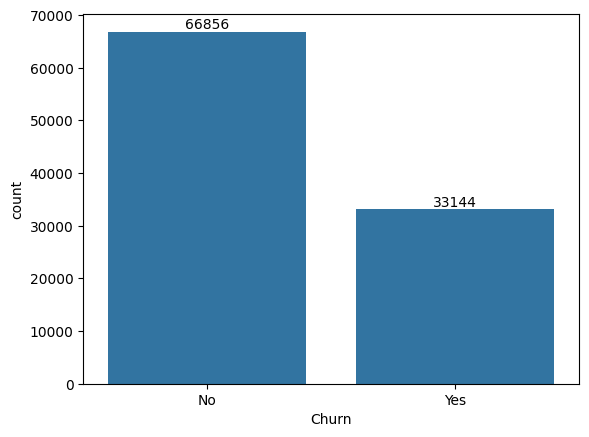

In [94]:
bar_c = sns.countplot(x= 'Churn',data=dataset)
bar_c.bar_label(bar_c.containers[0])

In [95]:
dataset['Churn'].value_counts(normalize=True)*100

Churn
No     66.856
Yes    33.144
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Gender wise churn')

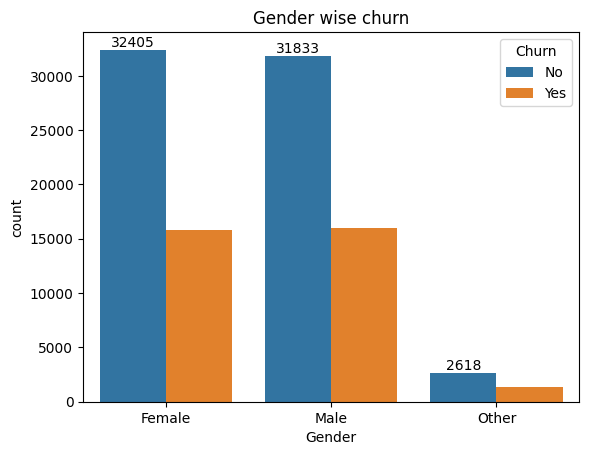

In [96]:
bar_ch=sns.countplot(x='Gender',data=dataset,hue = 'Churn')
bar_ch.bar_label(bar_ch.containers[0])
plt.title('Gender wise churn')

* Basis of Tenure

<Axes: xlabel='Tenure', ylabel='Count'>

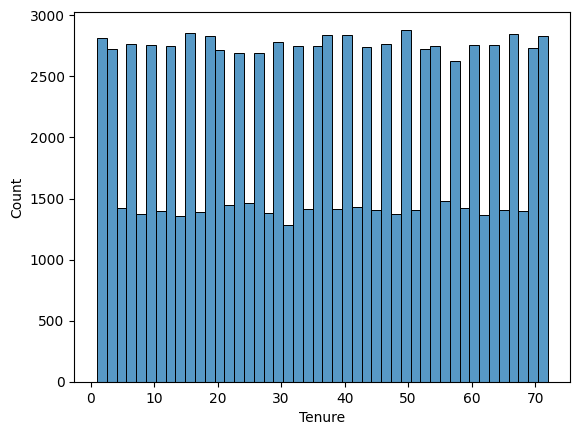

In [97]:
sns.histplot(x ='Tenure',data=dataset)

Text(0.5, 1.0, 'Tenure wise bar')

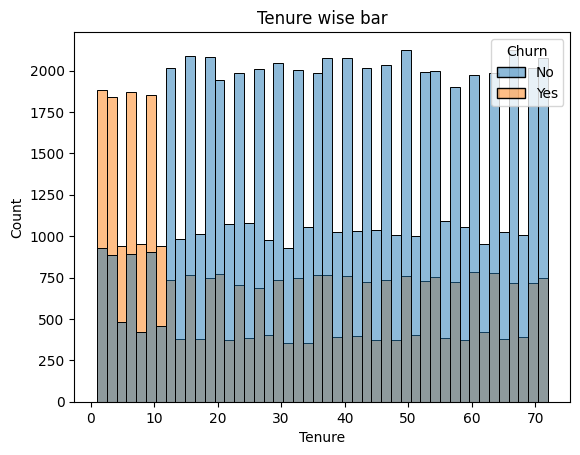

In [98]:
sns.histplot(x ='Tenure',data=dataset,hue='Churn')
plt.title("Tenure wise bar")

* most people churn initial mounth or when start this packegae

[Text(0, 0, '16478'), Text(0, 0, '29348'), Text(0, 0, '21030')]

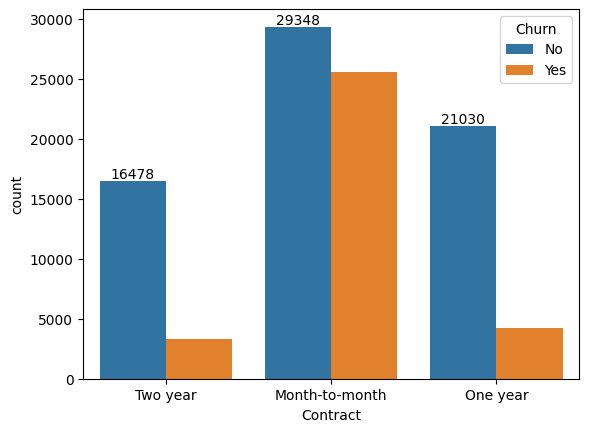

In [99]:
bar_c = sns.countplot(x= 'Contract',data=dataset, hue = 'Churn')
bar_c.bar_label(bar_c.containers[0])

In [100]:
df_pct = dataset.groupby('Contract')['Churn'].value_counts(normalize=True).mul(100).reset_index(name='percent')

Text(0.5, 1.0, 'Tenure wise chart')

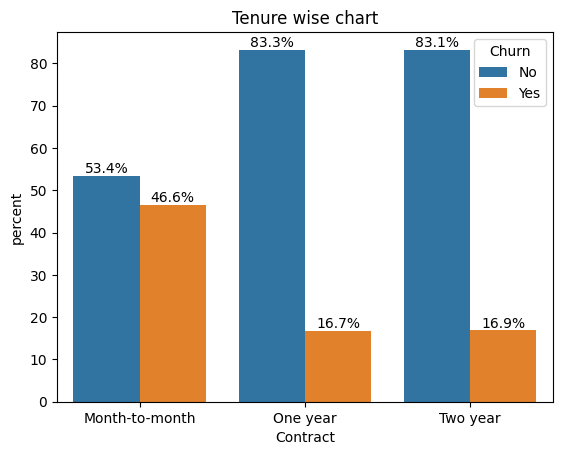

In [101]:
ax = sns.barplot(x='Contract', y='percent', hue='Churn', data=df_pct)
ax.bar_label(ax.containers[0], fmt='%.1f%%')
ax.bar_label(ax.containers[1], fmt='%.1f%%')
plt.title("Tenure wise chart")


* here we can see most of the people churn month to month contruct

* we can also see all of categorical value in one time

In [102]:
dataset.columns.values

array(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'Contract', 'PaymentMethod', 'TotalCharges', 'Churn'], dtype=object)

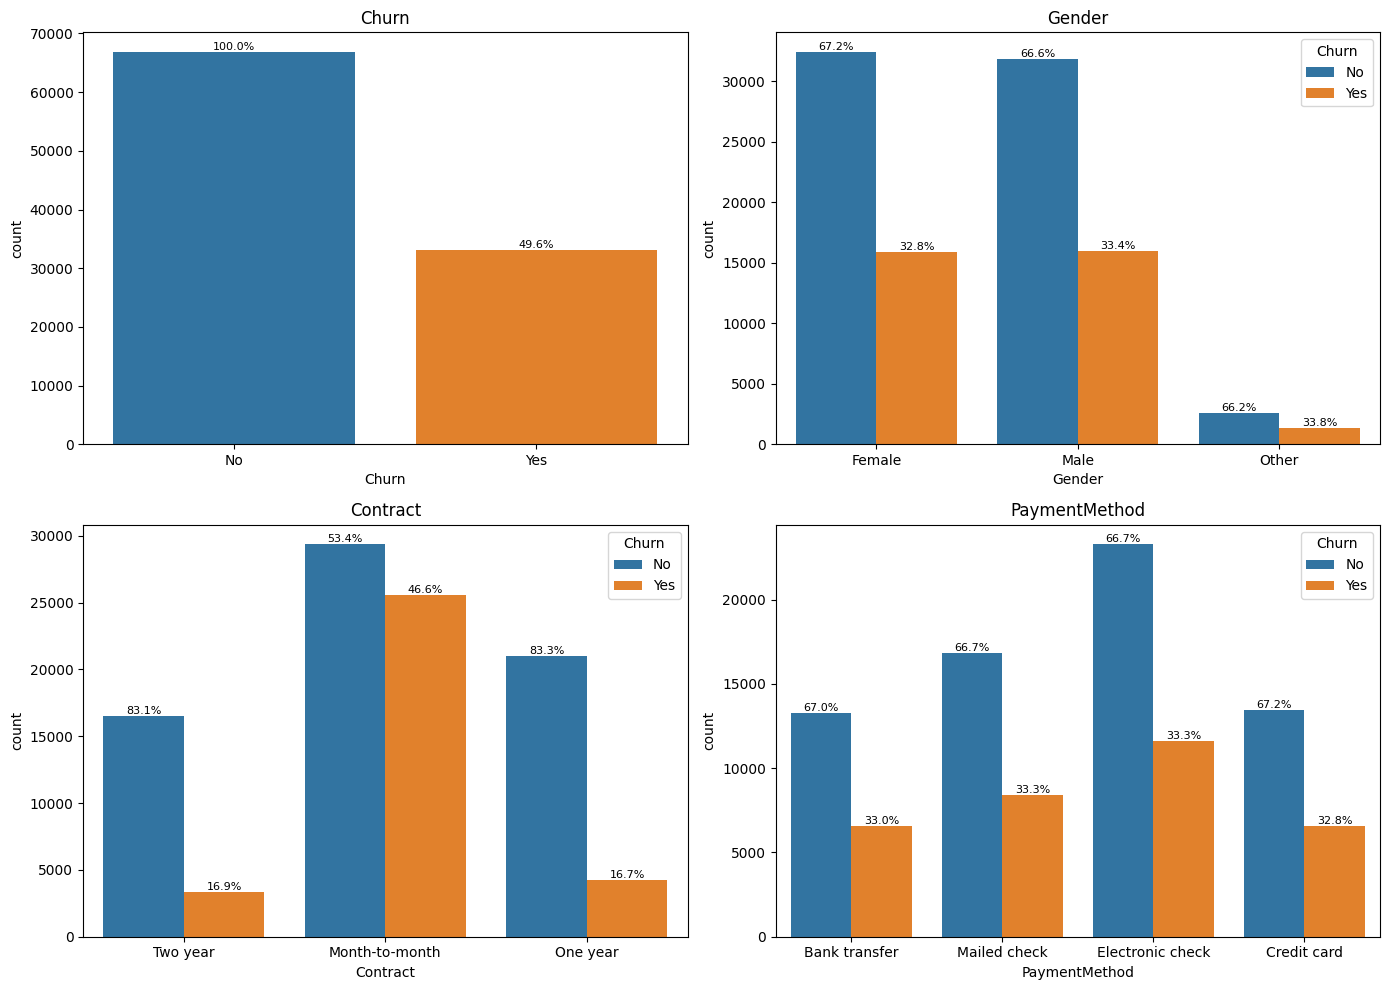

In [103]:
cat_cols = ['Churn','Gender','Contract','PaymentMethod']

plt.figure(figsize=(14,10))

for i, col in enumerate(cat_cols, 1):
    ax = plt.subplot(2,2,i)
    sns.countplot(x=col, data=dataset, hue='Churn', ax=ax)
    ax.set_title(col)

    totals = dataset[col].value_counts()
    for c in ax.containers:
        ax.bar_label(
            c,
            labels=[f'{v/totals[l.get_text()]*100:.1f}%' if v>0 else '' 
                    for v,l in zip(c.datavalues, ax.get_xticklabels())],
            label_type='edge',
            fontsize=8
        )

plt.tight_layout()


* Total Charges wise analysis

In [104]:
(dataset['TotalCharges'] < 0).sum()


np.int64(265)

In [105]:
dataset.loc[dataset['TotalCharges'] < 0, 'TotalCharges'] = 0


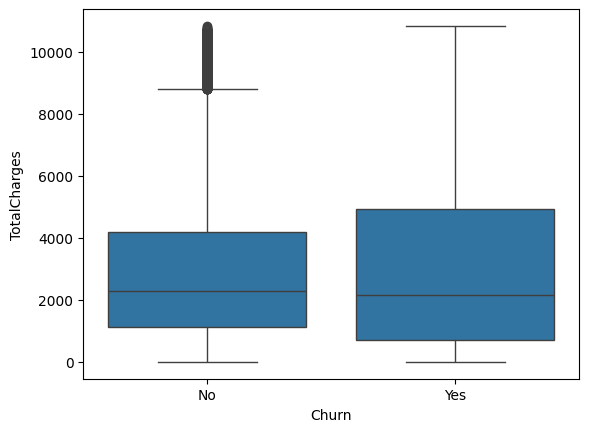

In [106]:
sns.boxplot(x='Churn', y='TotalCharges', data=dataset)
plt.show()


In [107]:
tmp = dataset.copy()
tmp['Churn01'] = tmp['Churn'].map({'No':0,'Yes':1})
tmp['TC_bin'] = pd.qcut(tmp['TotalCharges'], 10, duplicates='drop')

(tc_rate := tmp.groupby('TC_bin')['Churn01'].mean().mul(100)).round(2)


C:\Users\Asus\AppData\Local\Temp\ipykernel_13240\1929065415.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (tc_rate := tmp.groupby('TC_bin')['Churn01'].mean().mul(100)).round(2)


TC_bin
(-0.001, 398.356]       52.20
(398.356, 763.224]      37.72
(763.224, 1186.514]     31.10
(1186.514, 1676.698]    25.14
(1676.698, 2268.06]     23.18
(2268.06, 2983.484]     24.69
(2983.484, 3866.212]    26.76
(3866.212, 5004.292]    29.41
(5004.292, 6572.503]    35.77
(6572.503, 10831.46]    45.47
Name: Churn01, dtype: float64

In [108]:
tmp = dataset.copy()
tmp['Churn01'] = tmp['Churn'].map({'No':0, 'Yes':1})
tmp['Tenure_bin'] = pd.qcut(tmp['Tenure'], 4, duplicates='drop')

In [109]:
tmp.head()


,CustomerID,Age,Gender,Tenure,MonthlyCharges,Contract,PaymentMethod,TotalCharges,Churn,Churn01,Tenure_bin
0,1,56,Female,68,147.58,Two year,Bank transfer,10052.03,No,0,"(54.0, 72.0]"
1,2,69,Male,32,22.54,Month-to-month,Mailed check,686.78,No,0,"(18.0, 37.0]"
2,3,46,Female,10,52.47,One year,Electronic check,537.88,No,0,"(0.999, 18.0]"
3,4,32,Male,22,109.67,Month-to-month,Mailed check,2390.04,Yes,1,"(18.0, 37.0]"
4,5,60,Female,54,130.98,Month-to-month,Credit card,7081.28,No,0,"(37.0, 54.0]"


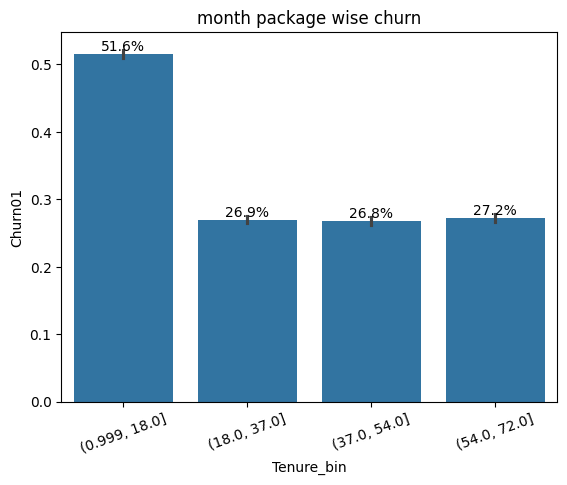

In [110]:
ax = sns.barplot(data=tmp, x='Tenure_bin', y='Churn01')
plt.xticks(rotation=20)
plt.title("month package wise churn")

for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom')

plt.show()


In [111]:
from sklearn.model_selection import train_test_split

In [130]:
x = dataset.drop('Churn', axis=1)
y = dataset['Churn'].map({'No': 0, 'Yes': 1})

In [131]:
X = pd.get_dummies(X, drop_first=True)

In [135]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [137]:
model = LogisticRegression(max_iter =1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [139]:
Prediction = model.predict(x_test)
Prediction

array([0, 0, 0, ..., 0, 1, 0])

In [143]:
print(confusion_matrix(y_test, Prediction))
print(classification_report(y_test, Prediction))

[[11395  1976]
 [ 3554  3075]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80     13371
           1       0.61      0.46      0.53      6629

    accuracy                           0.72     20000
   macro avg       0.69      0.66      0.67     20000
weighted avg       0.71      0.72      0.71     20000

